<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/LogRegression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [23]:
fname = '/content/drive/MyDrive/Colab Notebooks/Files/heart.csv'

df = pd.read_csv(fname)

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df['target'].unique()

array(['target', '1', '0'], dtype=object)

In [49]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


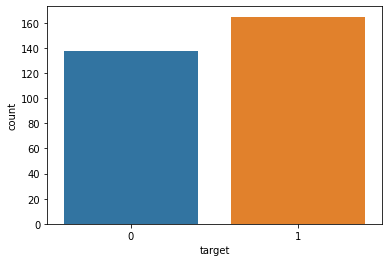

In [30]:
sns.countplot(data =df, x = 'target')

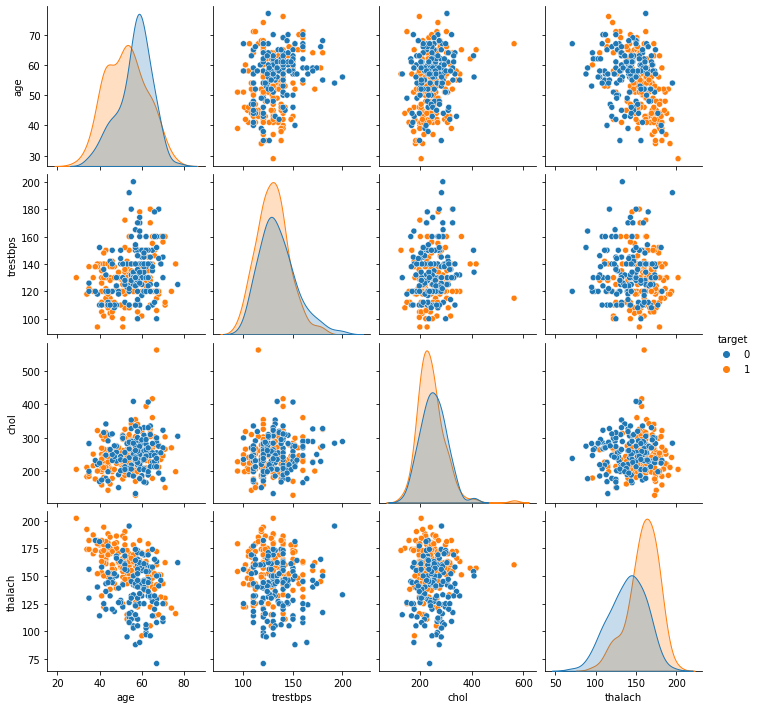

In [96]:
column_names = ['age','trestbps', 'chol','thalach','target']
sns.pairplot(df[column_names], hue ='target',)

In [98]:
column_name = ['age']
type(df[column_name])

pandas.core.frame.DataFrame

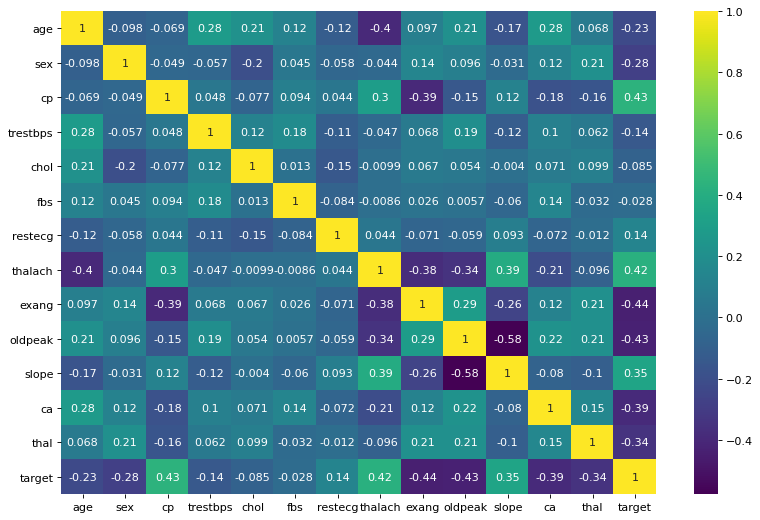

In [62]:
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(df.corr(),annot= True, cmap='viridis')

In [40]:
X = df.drop('target', axis=1)
y= df['target']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=101)

In [68]:
scaler = StandardScaler()

In [69]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegressionCV

In [48]:
log_model = LogisticRegressionCV()

In [70]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [72]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [73]:
log_model.C_

array([0.04641589])

In [74]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [87]:
log_model.coef_[0]

array([-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
        0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
        0.25101033, -0.49735752, -0.37448551])

In [80]:
coefs = pd.Series(index =X.columns, data=log_model.coef_[0])

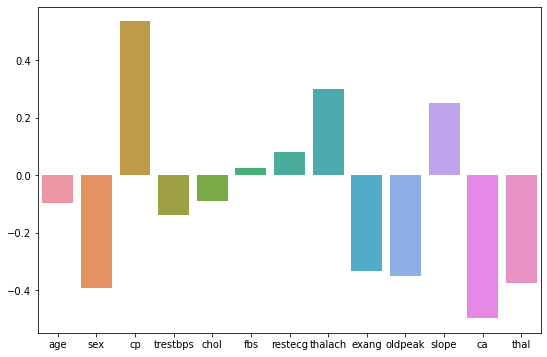

In [108]:
coefs.sort_values()
plt.figure(figsize=(9,6))
sns.barplot(x= coefs.index, y= coefs.values)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [112]:
y_pred = log_model.predict(scaled_X_test)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



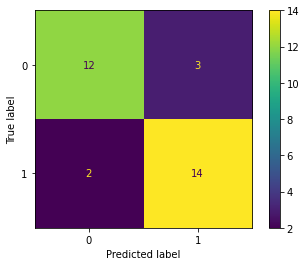

In [114]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [116]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

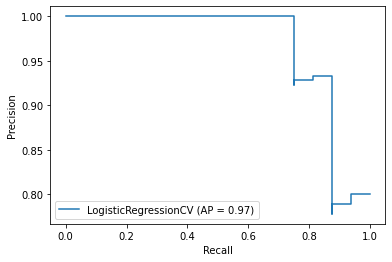

In [117]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

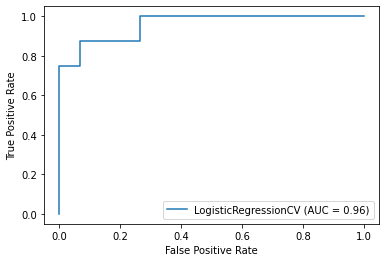

In [118]:
plot_roc_curve(log_model, scaled_X_test, y_test)

In [120]:
patient = [[48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]]


In [122]:
log_model.predict(patient)

array([0])

In [123]:
log_model.predict_proba(patient)

array([[0.98646, 0.01354]])